# Parameter tuning

Probability of synaptic transmission is set tp 35% and unitary conductance is 100pS, which is scaled by network size. In Str-to-GP synapses, this unitary conductance is divided by the number of Str cells. In GP-to-SNr synapses, the unitary conductance is scaled by the number of GP cells. These parameters are manipulated directly in the plotBGdelayline.m file

The 4th subfigure shows total synaptic input received by a GP cell from Str cells. 
The last subfigure is the total synaptic input received by a SNr cell from all GP cells.

Elapsed time is 0.538402 seconds.
> In legend>set_children_and_strings (line 674)
  In legend>make_legend (line 346)
  In legend (line 294)
  In plotBGdelayline (line 26)
  In run (line 86)


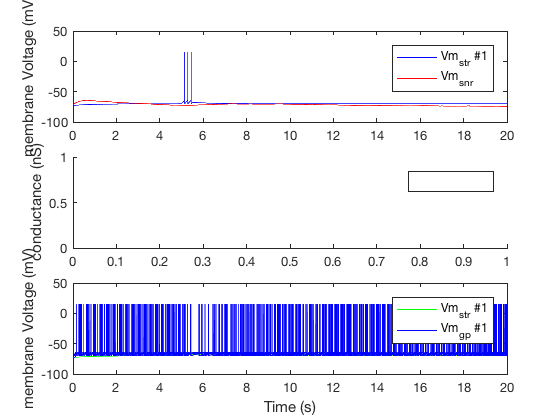

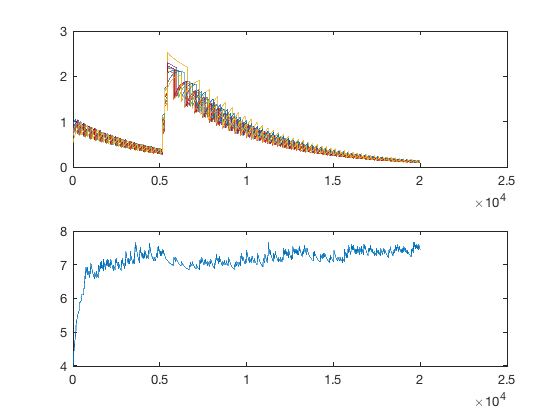

In [1]:
[Vm_gp,Vm_snr,Vm_str,Isyn_gp_out,Isyn_snr_out] = BGdelayline('n',100);
run('plotBGdelayline.m')

GP stops firing, but SNr is quiescent. Therefore, I increase constant excitatory input to SNr from 7pA to 10pA in BGdelayline function.

Elapsed time is 0.463242 seconds.
> In legend>set_children_and_strings (line 674)
  In legend>make_legend (line 346)
  In legend (line 294)
  In plotBGdelayline (line 26)
  In run (line 86)


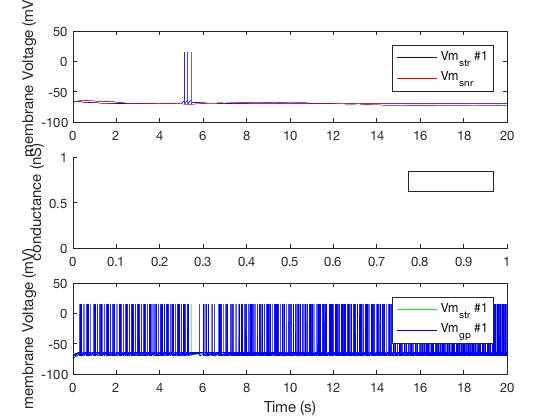

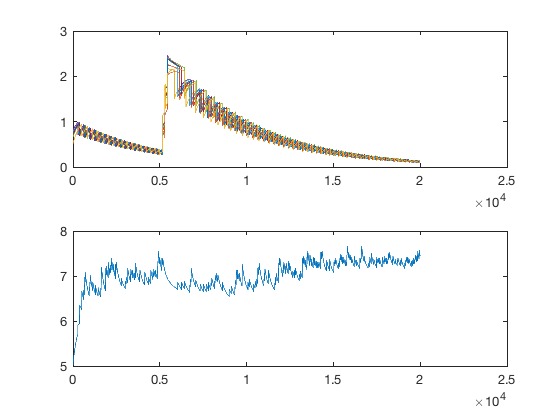

In [2]:
[Vm_gp,Vm_snr,Vm_str,Isyn_gp_out,Isyn_snr_out] = BGdelayline('n',100);
run('plotBGdelayline.m')

Still SNr excitatory input is not strong enough to overcome inhibition from GP cells. Hence, the E_in is increased to 12.5pA.

Elapsed time is 0.464197 seconds.


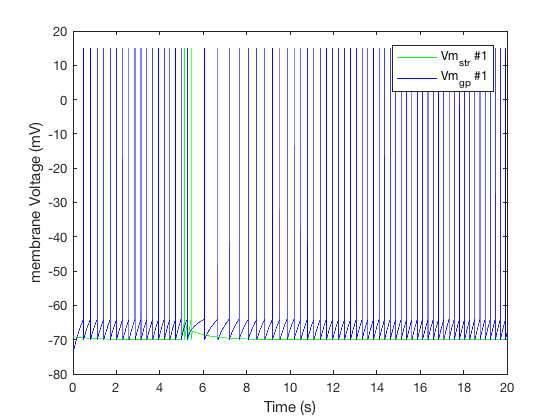

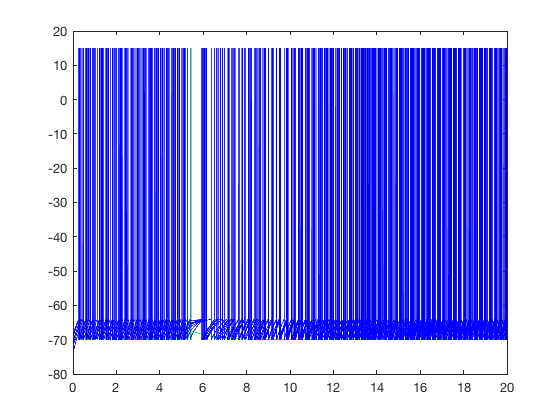

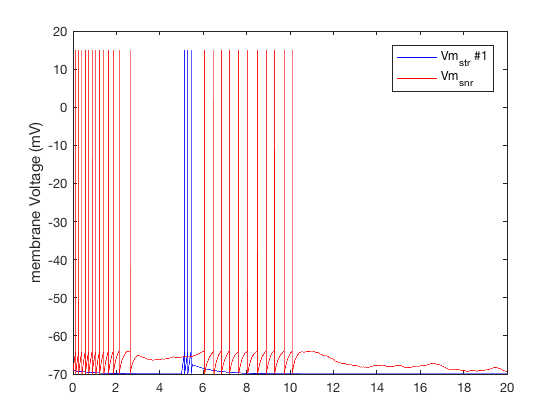

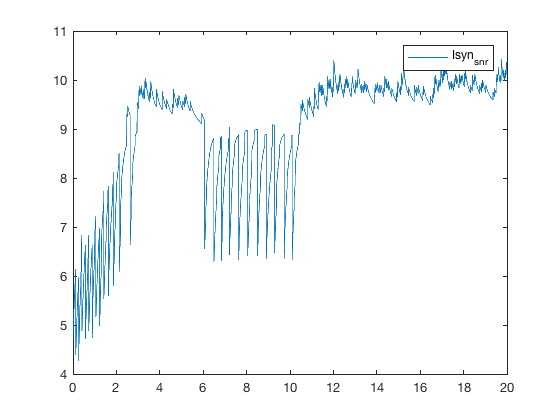

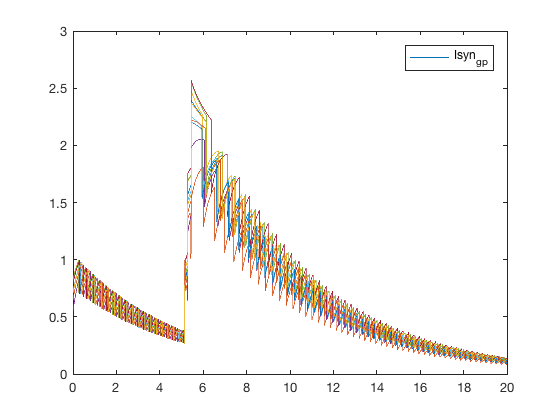

In [26]:
[Vm_gp,Vm_snr,Vm_str,Isyn_gp_out,Isyn_snr_out] = BGdelayline('n',100);
%run('plotBGdelayline.m')

t_span = 0:0.001:20;

figure
%subplot(4,1,4)
plot(t_span,Isyn_gp_out')
legend('Isyn_{gp}')

figure
%subplot(4,1,3)
plot(t_span,Isyn_snr_out')
legend('Isyn_{snr}')
figure
%subplot(4,1,2)
plot(t_span,Vm_str(5,1:length(t_span)),'b')
hold on
%  plot(t_span,Vm_gp(1,1:length(t_span))','b')
plot(t_span,Vm_snr(1,1:length(t_span)),'r')
% legend('Vm_{str}','Vm_{gp}','Vm_{snr}')
legend('Vm_{str} #1','Vm_{snr}')
ylabel('membrane Voltage (mV)')
% xlabel('Time (s)')

%subplot(4,1,3)
%hold on
%plot(t_span,g_gp2snr(:,1:length(t_span)),'g')
% LEGEND('G_{STR2GP}','G_{GP2SNR}')
%legend('g_{gp2snr}')
%ylabel('conductance (nS)')
figure
%subplot(4,1,1)
plot(t_span,Vm_str(5,1:length(t_span)),'g')
hold on
plot(t_span,Vm_gp(:,1:length(t_span)),'b')

figure
plot(t_span,Vm_str(5,1:length(t_span)),'g')
hold on
plot(t_span,Vm_gp(4,1:length(t_span)),'b')

%  plot(t_span,Vm_snr(1,1:length(t_span)),'r')
% legend('Vm_{str}','Vm_{gp}','Vm_{snr}')
legend('Vm_{str} #1','Vm_{gp} #1')
ylabel('membrane Voltage (mV)')
xlabel('Time (s)')


Onset of striatum firing triggers disinhibition of SNr firing, as indicated by increased firing after ~1s delay

# Effect of GP firing on delay time

One idea is that, in a cascading inhibition, GP firing rate before the activation of Str modulates the delay time of SNr cells.

Increase in GP firing can be achieved through:
1) increasing net excitatory input
2) lowering spike threshold



First, I wrote a function that will conveniently plot spike raster of all the cells in BG delay line:

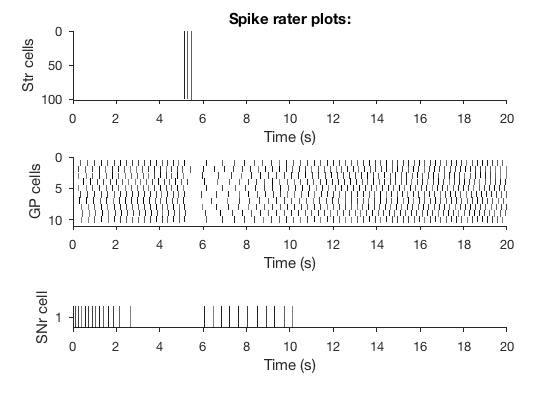

In [97]:
%% Spike Rasters

figure
subplot(3,1,1)
plotRaster(Vm_str);
title('Spike rater plots:')
ylabel('Str cells')
subplot(3,1,2)

plotRaster(Vm_gp);
ylabel('GP cells')
subplot(3,1,3)

plotRaster(Vm_snr);
ylabel('SNr cell')


## 1) Increase net excitatory input to GP cells

The net excitatory input is increased from 3pA to 4pA while maintaining the ratio of excitatory input size to GP and SNr (3/10); 

Elapsed time is 0.462568 seconds.


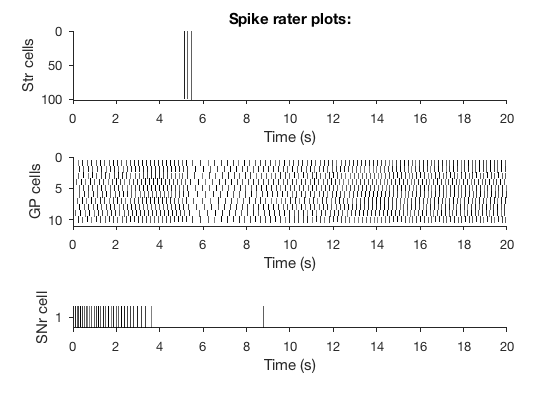

In [102]:
%%Simulation
[Vm_gp,Vm_snr,Vm_str,Isyn_gp_out,Isyn_snr_out] = BGdelayline(); 

%%Spike Rasters
figure
subplot(3,1,1)
plotRaster(Vm_str);
title('Spike rater plots:')
ylabel('Str cells')
subplot(3,1,2)

plotRaster(Vm_gp);
ylabel('GP cells')
subplot(3,1,3)

plotRaster(Vm_snr);
ylabel('SNr cell')

The simulation above reveals that the increase in firing rate in GP lengthens delay in SNr. 
Next, I look at the effect of changing net excitatory input at finer scale of 0.1pA, which is sufficient to alter firing of GP neurons.

At 3.1pA,

Elapsed time is 0.426392 seconds.


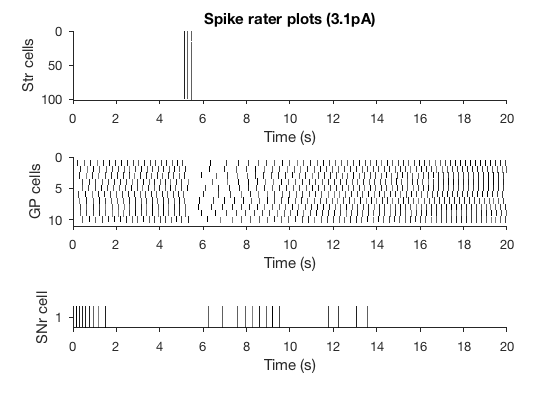

In [118]:
%%Simulation
[Vm_gp,Vm_snr,Vm_str,Isyn_gp_out,Isyn_snr_out] = BGdelayline(); 

%%Spike Rasters
figure
subplot(3,1,1)
plotRaster(Vm_str);
title('Spike rater plots (3.1pA)')
ylabel('Str cells')
subplot(3,1,2)

plotRaster(Vm_gp);
ylabel('GP cells')
subplot(3,1,3)

plotRaster(Vm_snr);
ylabel('SNr cell')

The latency of first SNr spike after stimulation is increased from ~1s to ~1.2s, but this is just one incidence. It is necessry to plot histogram of spike latency from numerous simulations. 

 Next thing To Do: introduce a sampling method (ex Monte Carlo) so that I can analyze distribution of spike latency and compute rate estimate from a larger sample.  

## Monte Carlo simulation of the delay line network

Here I perform 100 simulation of the model and save spike timing:

In [7]:
% Monte Carlo
spk_gp=[];
spk_snr=[];
spk_str=[];
for l = 1:100
%%Simulation
[Vm_gp,Vm_snr,Vm_str] = BGdelayline();

spk_gp = [spk_gp; Vm_gp==15];
spk_snr = [spk_snr; Vm_snr==15];
spk_str = [spk_str; Vm_str==15];
end


Elapsed time is 0.448893 seconds.


The raster plot of 100 simulations reveals fluctuations of spikes in the model. 

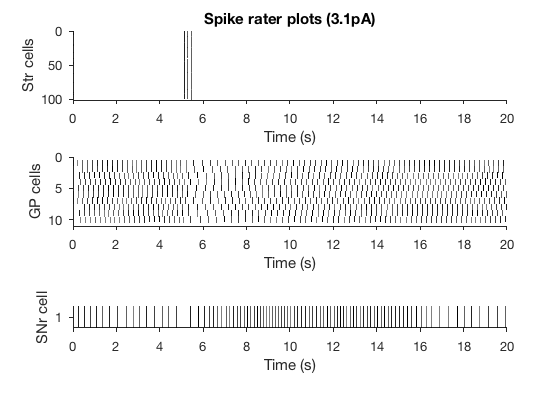

In [8]:
figure
subplot(3,1,1)
plotRaster(spk_str);
title('Spike rater plots (3.1pA)')
ylabel('Str cells')
subplot(3,1,2)

plotRaster(spk_gp);
ylabel('GP cells')
subplot(3,1,3)

plotRaster(spk_snr);
ylabel('SNr cell')

# Experiments  

## Experiment 1: Threshold of SNr delay

I will test the range of Str activation that enables delayed firing of SNr. First, I will find the minimal number of Str cells need to pass delay, and then test the delay property from minimum to maximum number of Str cells to ensure that latency distribution remains unchanged. 

When 0% of Str cells are activated,

Elapsed time is 0.485764 seconds.
Elapsed time is 0.470828 seconds.
Elapsed time is 0.446363 seconds.
Elapsed time is 0.449363 seconds.
Elapsed time is 0.453137 seconds.
Elapsed time is 0.443442 seconds.
Elapsed time is 0.451898 seconds.
Elapsed time is 0.449022 seconds.
Elapsed time is 0.442778 seconds.
Elapsed time is 0.443196 seconds.


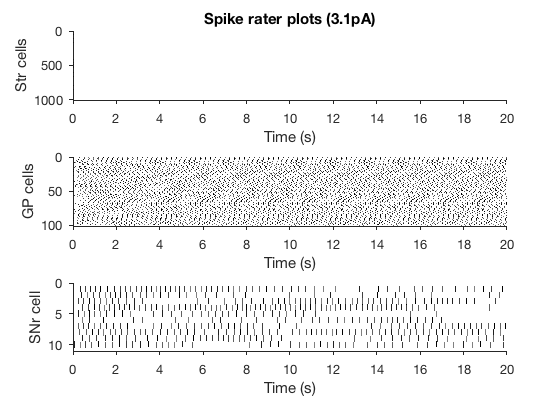

In [20]:
% Monte Carlo
spk_gp=[];
spk_snr=[];
spk_str=[];
for l = 1:10
%%Simulation
[Vm_gp,Vm_snr,Vm_str] = BGdelayline('stimCellPer',0);

spk_gp = [spk_gp; Vm_gp==15];
spk_snr = [spk_snr; Vm_snr==15];
spk_str = [spk_str; Vm_str==15];
end

%%Plot
figure
subplot(3,1,1)
plotRaster(spk_str);
title('Spike rater plots (5pA)')
ylabel('Str cells')
subplot(3,1,2)

plotRaster(spk_gp);
ylabel('GP cells')
subplot(3,1,3)

plotRaster(spk_snr);
ylabel('SNr cell')

There is no transimission of signals to GP and SNr. 

When 20% of cells are activated,

Elapsed time is 0.492137 seconds.
Elapsed time is 0.483083 seconds.
Elapsed time is 0.459035 seconds.
Elapsed time is 0.447366 seconds.
Elapsed time is 0.452059 seconds.
Elapsed time is 0.450452 seconds.
Elapsed time is 0.454921 seconds.
Elapsed time is 0.450937 seconds.
Elapsed time is 0.443964 seconds.
Elapsed time is 0.447937 seconds.


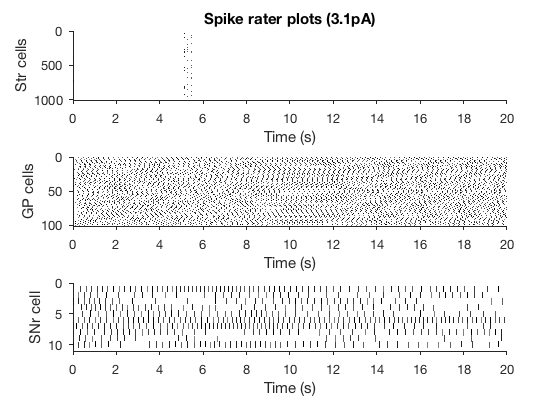

In [22]:
% Monte Carlo
spk_gp=[];
spk_snr=[];
spk_str=[];
for l = 1:10
%%Simulation
[Vm_gp,Vm_snr,Vm_str] = BGdelayline('stimCellPer',20);

spk_gp = [spk_gp; Vm_gp==15];
spk_snr = [spk_snr; Vm_snr==15];
spk_str = [spk_str; Vm_str==15];
end

%%Plot
figure
subplot(3,1,1)
plotRaster(spk_str);
title('Spike rater plots (5pA)')
ylabel('Str cells')
subplot(3,1,2)

plotRaster(spk_gp);
ylabel('GP cells')
subplot(3,1,3)

plotRaster(spk_snr);
ylabel('SNr cell')

The activation is not strong enough to inhibit firing of GP cells. 

Next, 50% of cells are activated

Elapsed time is 0.491730 seconds.
Elapsed time is 0.479142 seconds.
Elapsed time is 0.501575 seconds.
Elapsed time is 0.479026 seconds.
Elapsed time is 0.472483 seconds.
Elapsed time is 0.453283 seconds.
Elapsed time is 0.454435 seconds.
Elapsed time is 0.456015 seconds.
Elapsed time is 0.448795 seconds.
Elapsed time is 0.446245 seconds.


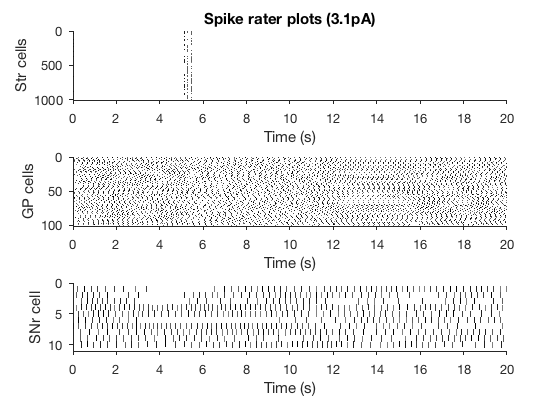

In [24]:
% Monte Carlo
spk_gp=[];
spk_snr=[];
spk_str=[];
for l = 1:10
%%Simulation
[Vm_gp,Vm_snr,Vm_str] = BGdelayline('stimCellPer',50);

spk_gp = [spk_gp; Vm_gp==15];
spk_snr = [spk_snr; Vm_snr==15];
spk_str = [spk_str; Vm_str==15];
end

%%Plot
figure
subplot(3,1,1)
plotRaster(spk_str);
title('Spike rater plots (5pA)')
ylabel('Str cells')
subplot(3,1,2)

plotRaster(spk_gp);
ylabel('GP cells')
subplot(3,1,3)

plotRaster(spk_snr);
ylabel('SNr cell')

For 60%, 

Elapsed time is 0.490182 seconds.
Elapsed time is 0.483571 seconds.
Elapsed time is 0.451328 seconds.
Elapsed time is 0.451776 seconds.
Elapsed time is 0.450040 seconds.
Elapsed time is 0.449959 seconds.
Elapsed time is 0.455412 seconds.
Elapsed time is 0.446620 seconds.
Elapsed time is 0.452740 seconds.
Elapsed time is 0.450690 seconds.


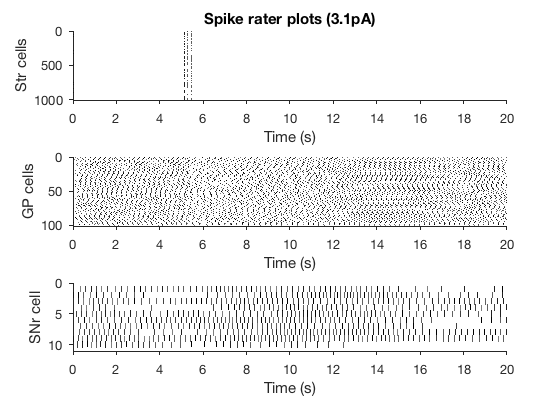

In [26]:
% Monte Carlo
spk_gp=[];
spk_snr=[];
spk_str=[];
for l = 1:10
%%Simulation
[Vm_gp,Vm_snr,Vm_str] = BGdelayline('stimCellPer',60);

spk_gp = [spk_gp; Vm_gp==15];
spk_snr = [spk_snr; Vm_snr==15];
spk_str = [spk_str; Vm_str==15];
end

%%Plot
figure
subplot(3,1,1)
plotRaster(spk_str);
title('Spike rater plots (5pA)')
ylabel('Str cells')
subplot(3,1,2)

plotRaster(spk_gp);
ylabel('GP cells')
subplot(3,1,3)

plotRaster(spk_snr);
ylabel('SNr cell')

GP cells are inhibited and SNr cells disinhibited at 60% activation

Next, in order to find the threshold, I test the values between 50% and 60%.

Elapsed time is 0.454188 seconds.
Elapsed time is 0.472134 seconds.
Elapsed time is 0.473181 seconds.
Elapsed time is 0.486812 seconds.
Elapsed time is 0.477924 seconds.
Elapsed time is 0.492158 seconds.
Elapsed time is 0.469330 seconds.
Elapsed time is 0.459361 seconds.
Elapsed time is 0.453222 seconds.
Elapsed time is 0.448405 seconds.


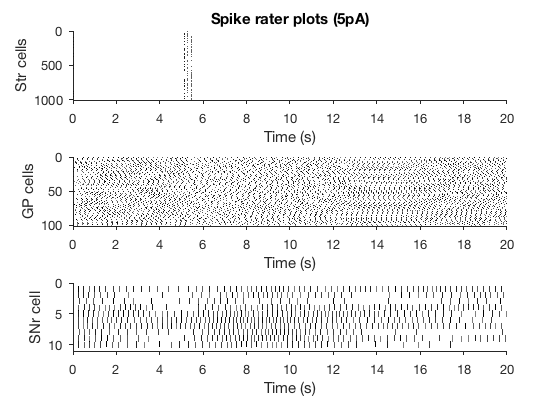

In [70]:
% Monte Carlo
spk_gp=[];
spk_snr=[];
spk_str=[];
for l = 1:10
%%Simulation
[Vm_gp,Vm_snr,Vm_str] = BGdelayline('stimCellsPer',54);

spk_gp = [spk_gp; Vm_gp==15];
spk_snr = [spk_snr; Vm_snr==15];
spk_str = [spk_str; Vm_str==15];
end

%%Plot
figure
subplot(3,1,1)
plotRaster(spk_str);
title('Spike rater plots (5pA)')
ylabel('Str cells')
subplot(3,1,2)

plotRaster(spk_gp);
ylabel('GP cells')
subplot(3,1,3)

plotRaster(spk_snr);
ylabel('SNr cell')

The threshold of Str activation is ~54%.


## Does the amount of Str activation change the latency of SNr firing?

I will compare the onset of increase in SNr firing while changing the percentage of Str cell activation from 60 to 100, in increments of 10. ( 5 conditions)

Elapsed time is 0.453124 seconds.
Elapsed time is 0.483540 seconds.
Elapsed time is 0.484548 seconds.
Elapsed time is 0.468993 seconds.
Elapsed time is 0.504241 seconds.
Elapsed time is 0.471451 seconds.
Elapsed time is 0.464378 seconds.
Elapsed time is 0.447930 seconds.
Elapsed time is 0.446470 seconds.
Elapsed time is 0.447296 seconds.
Elapsed time is 0.453204 seconds.
Elapsed time is 0.455748 seconds.
Elapsed time is 0.503945 seconds.
Elapsed time is 0.478187 seconds.
Elapsed time is 0.471730 seconds.
Elapsed time is 0.455636 seconds.
Elapsed time is 0.455640 seconds.
Elapsed time is 0.452285 seconds.
Elapsed time is 0.511952 seconds.
Elapsed time is 0.470195 seconds.
Elapsed time is 0.453485 seconds.
Elapsed time is 0.458650 seconds.
Elapsed time is 0.449906 seconds.
Elapsed time is 0.453215 seconds.
Elapsed time is 0.449954 seconds.
Elapsed time is 0.452309 seconds.
Elapsed time is 0.451457 seconds.
Elapsed time is 0.453101 seconds.
Elapsed time is 0.481554 seconds.
Elapsed time i

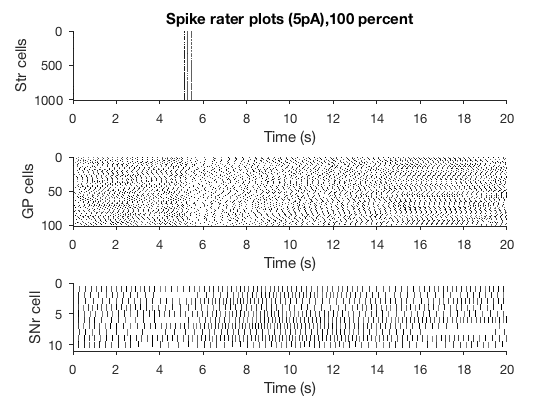

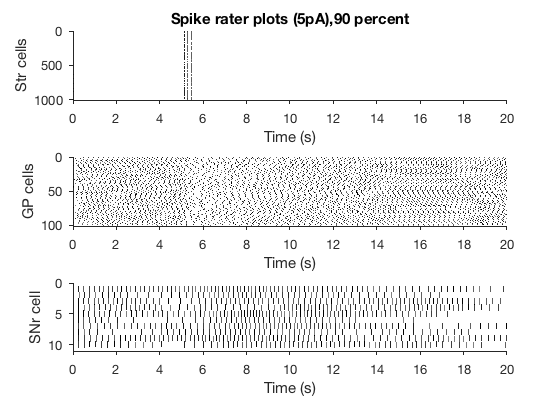

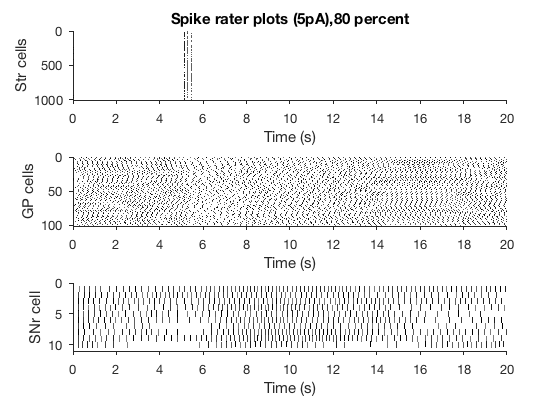

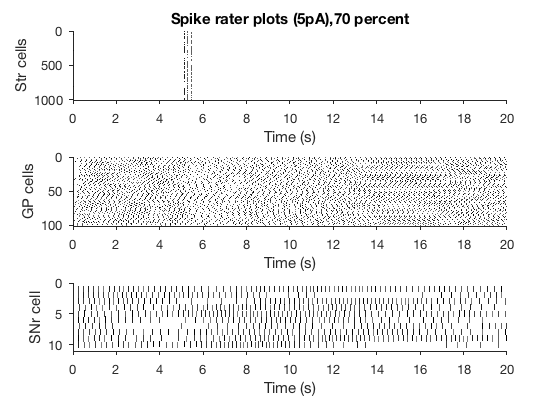

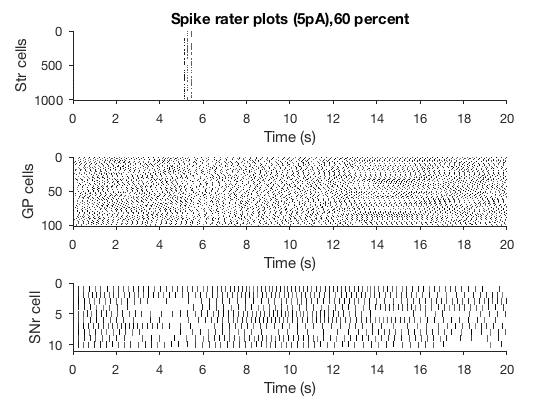

In [84]:
testRange = 10*(6:10);

for test_i = 1:length(testRange)
    spk_gp=[];
    spk_snr=[];
    spk_str=[];
    for l = 1:10
    %%Simulation
        [Vm_gp,Vm_snr,Vm_str] = BGdelayline('stimCellsPer',testRange(test_i));

        spk_gp  = [spk_gp; Vm_gp==15];
        spk_snr = [spk_snr; Vm_snr==15];
        spk_str = [spk_str; Vm_str==15];
    end

    %%Plot
    figure(test_i)
    subplot(3,1,1)
    plotRaster(spk_str);
    title(sprintf('Spike rater plots (5pA),%d percent',testRange(test_i)))
    ylabel('Str cells')
    subplot(3,1,2)

    plotRaster(spk_gp);
    ylabel('GP cells')
    subplot(3,1,3)

    plotRaster(spk_snr);
    ylabel('SNr cell')
    hold on
end

The latency for all conditions is roughly 6s, which is 1s after Str stimulation (at 5s)

# Experiment 2: Effect of GP firing rate on SNr delay time

## Manipulation 1

Net inhibition from GP to Snr is scaled by dividing probability of transmission by the total excitatory input to GP cells. Hence, the total inhibition received by a SNr cell is kept in the range of 6-10pA. 

Below simulation demonstrates that in our model the net inhibition to SNr fluctuates in the similar range even when the GP firing rate differs.

Elapsed time is 0.472158 seconds.
Elapsed time is 0.506659 seconds.


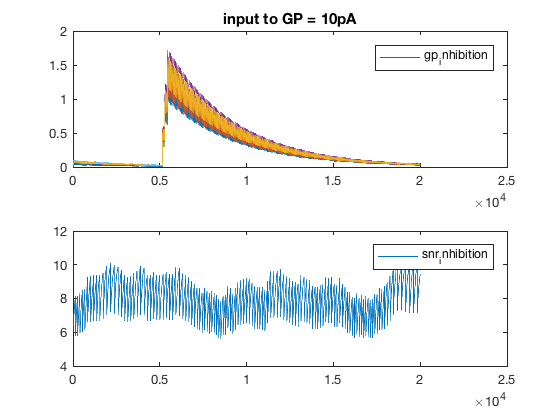

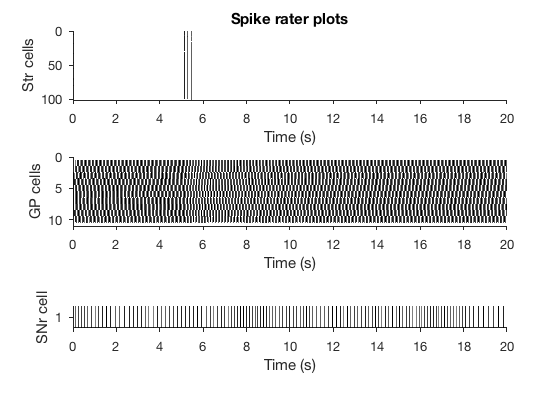

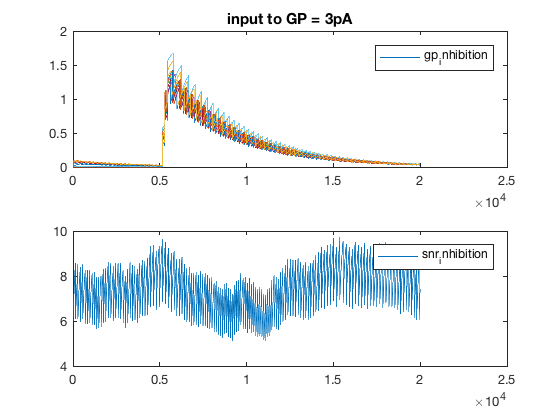

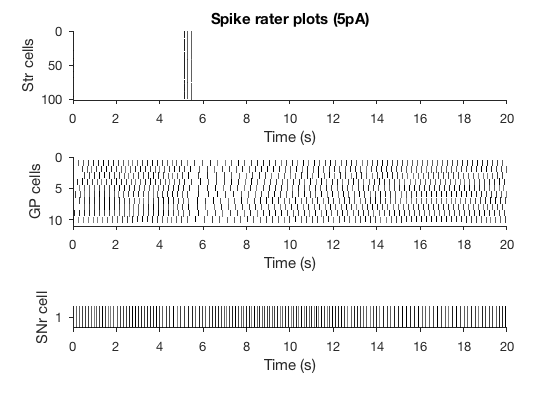

In [5]:
%% Condition 1 - 3pA
spk_gp=[];
spk_snr=[];
spk_str=[];
Isyn_snr=[];

for l = 1:1
%%Simulation
[Vm_gp,Vm_snr,Vm_str, Isyn_gp, Isnr] = BGdelayline('stimCellsPer',100,'I_exc_gp',30);

spk_gp = [spk_gp; Vm_gp==15];
spk_snr = [spk_snr; Vm_snr==15];
spk_str = [spk_str; Vm_str==15];
Isyn_snr = [Isyn_snr ; Isnr];
end

%%Plot
figure
subplot(3,1,1)
plotRaster(spk_str);
title('Spike rater plots (5pA)')
ylabel('Str cells')
subplot(3,1,2)

plotRaster(spk_gp);
ylabel('GP cells')
subplot(3,1,3)

plotRaster(spk_snr);
ylabel('SNr cell')


figure
subplot(2,1,1)
plot(Isyn_gp')
legend('gp_inhibition')
title('input to GP = 3pA')
subplot(2,1,2)
plot(Isyn_snr')
legend('snr_inhibition')


%% Condition 2 - 10pA
spk_gp=[];
spk_snr=[];
spk_str=[];
Isyn_snr=[];
for l = 1:1
%%Simulation
[Vm_gp,Vm_snr,Vm_str, Isyn_gp, Isnr] = BGdelayline('stimCellsPer',100,'I_exc_gp',100);

spk_gp = [spk_gp; Vm_gp==15];
spk_snr = [spk_snr; Vm_snr==15];
spk_str = [spk_str; Vm_str==15];
Isyn_snr = [Isyn_snr ; Isnr];
end

%%Plot
figure
subplot(3,1,1)
plotRaster(spk_str);
title('Spike rater plots')
ylabel('Str cells')
subplot(3,1,2)

plotRaster(spk_gp);
ylabel('GP cells')
subplot(3,1,3)

plotRaster(spk_snr);
ylabel('SNr cell')


figure
subplot(2,1,1)
plot(Isyn_gp')
legend('gp_inhibition')
title('input to GP = 10pA')
subplot(2,1,2)
plot(Isyn_snr')
legend('snr_inhibition')


Notice the slower time constant of net inhibitory current to SNr when GP cells are firing at higher rate. This increase in the decay constant probably contributes to the increased delay in higher GP firing rate condition. What causes this discrepancy in decay constant is unknown because decay constant of conductance between gp to snr synapses is constant. It is very interesting that the steady-state value of spontaneously firing and excited states of two conditions are same while the decay time changes.  

Previous experiments have shown that in cortical neurons synaptic response is roughly proportional to the input firing rate. This kind of synaptic depression or facilitation can be achieved through presynaptic (ex: buildup of Ca residual) or postynaptic mechanisms.  However, in our model, the dynamics of neuronal activity is described in membrane voltage, and it is difficult to find a direct mathematical translation of increasing total excitatory input to each GP cell to firing rate of GP. In order to validate our method of scaling the probability of transmission by total excitatory input, I will need to show through simulations that increasing Iexc is proportional to firing rate of these cells.

An interesting hypothesis is that, when GP cells are firing at higher rate, there is accumulated hyperpolarization in the postsynaptic side that makes the cell take longer to recover to resting potential. If SNr's threshold is relatively low, then this short disinhibition triggered by Str activation can make SNr fire more. (this is a postsynpatic explanation for why SNr cell starts increasing firing rate after longer delay at higher GP firing.

It is possible that short term plasticity like synaptic depression helps this delay mechanism to stay in a physiological range without linearly increasing the delay. these cells are capable of transmitting information with variable delay. At different firing rate, the time constants of linear filter is modulated. 

## Manipulation 2

Another approach to control the amount of net inhibition to SNr is by scaling the synaptic current from GP to SNr directly. Again, I will need to verify that increasing Iexc to SNr can linearly increase firing rate. It will be interesting to see if we achieve different effect on timescale of net inhibitory input to SNr through this integration. 

Elapsed time is 0.510428 seconds.
Elapsed time is 0.475027 seconds.


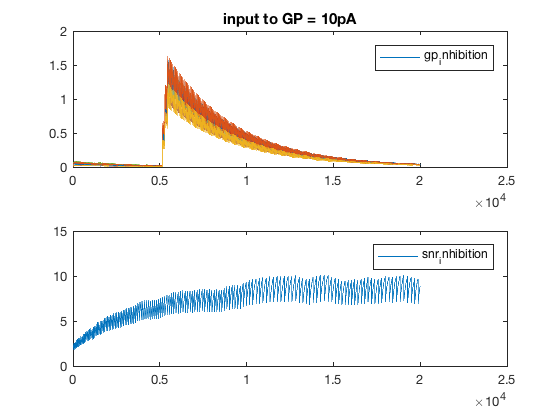

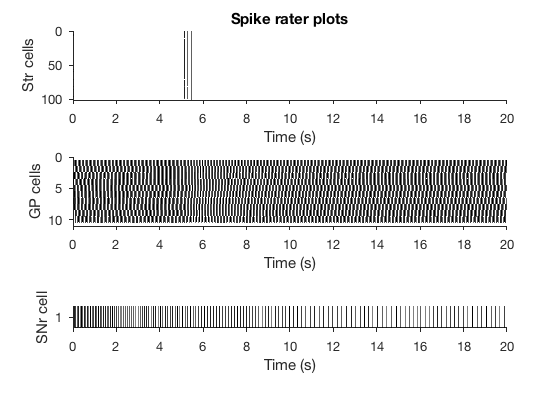

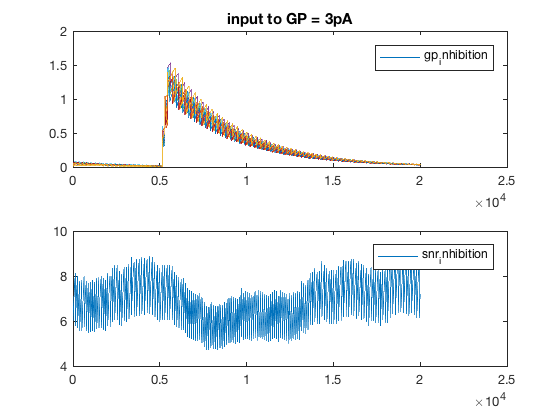

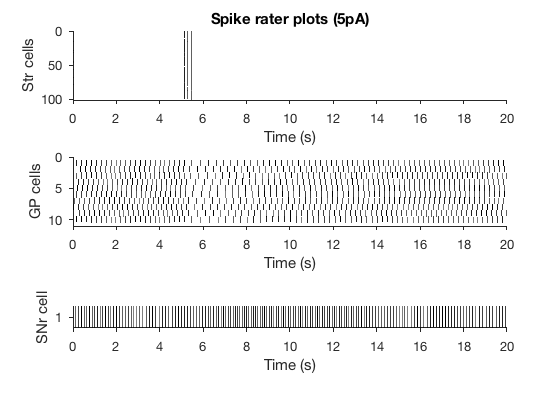

In [7]:
%% Condition 1 - 3pA
spk_gp=[];
spk_snr=[];
spk_str=[];
Isyn_snr=[];

for l = 1:1
%%Simulation
[Vm_gp,Vm_snr,Vm_str, Isyn_gp, Isnr] = BGdelayline('stimCellsPer',100,'I_exc_gp',30);

spk_gp = [spk_gp; Vm_gp==15];
spk_snr = [spk_snr; Vm_snr==15];
spk_str = [spk_str; Vm_str==15];
Isyn_snr = [Isyn_snr ; Isnr];
end

%%Plot
figure
subplot(3,1,1)
plotRaster(spk_str);
title('Spike rater plots (5pA)')
ylabel('Str cells')
subplot(3,1,2)

plotRaster(spk_gp);
ylabel('GP cells')
subplot(3,1,3)

plotRaster(spk_snr);
ylabel('SNr cell')


figure
subplot(2,1,1)
plot(Isyn_gp')
legend('gp_inhibition')
title('input to GP = 3pA')
subplot(2,1,2)
plot(Isyn_snr')
legend('snr_inhibition')


%% Condition 2 - 10pA
spk_gp=[];
spk_snr=[];
spk_str=[];
Isyn_snr=[];
for l = 1:1
%%Simulation
[Vm_gp,Vm_snr,Vm_str, Isyn_gp, Isnr] = BGdelayline('stimCellsPer',100,'I_exc_gp',100);

spk_gp = [spk_gp; Vm_gp==15];
spk_snr = [spk_snr; Vm_snr==15];
spk_str = [spk_str; Vm_str==15];
Isyn_snr = [Isyn_snr ; Isnr];
end

%%Plot
figure
subplot(3,1,1)
plotRaster(spk_str);
title('Spike rater plots')
ylabel('Str cells')
subplot(3,1,2)

plotRaster(spk_gp);
ylabel('GP cells')
subplot(3,1,3)

plotRaster(spk_snr);
ylabel('SNr cell')


figure
subplot(2,1,1)
plot(Isyn_gp')
legend('gp_inhibition')
title('input to GP = 10pA')
subplot(2,1,2)
plot(Isyn_snr')
legend('snr_inhibition')
